# Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

For more information,
read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98


14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T



You have to build separate models that can predict the minimum temperature for the next day and the maximum 
temperature for the next day based on the details provided in the dataset.

Dataset Link-

•https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


# Import necessory libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot  as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Assignements & HW\Internship\project1\Evaluation Phase\second phase/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
# Checking the dimension of the dataset
df.shape

(7752, 25)

In [4]:
# Checking the columns of the datasdet
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [5]:
# Check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
# Fill null values using fillna method

df["station"]=df["station"].fillna(df["station"].mean())
df["Present_Tmax"]=df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"]=df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"]=df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_RHmax"]=df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].mean())
df["LDAPS_Tmax_lapse"]=df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_Tmin_lapse"]=df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].mean())
df["LDAPS_WS"]=df["LDAPS_WS"].fillna(df["LDAPS_WS"].mean())
df["LDAPS_LH"]=df["LDAPS_LH"].fillna(df["LDAPS_LH"].mean())
df["LDAPS_CC1"]=df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"]=df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["LDAPS_CC3"]=df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].mean())
df["LDAPS_CC4"]=df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].mean())
df["LDAPS_PPT1"]=df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].mean())
df["LDAPS_PPT2"]=df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].mean())
df["LDAPS_PPT3"]=df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].mean())
df["LDAPS_PPT4"]=df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].mean())
df["Next_Tmax"]=df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"]=df["Next_Tmin"].fillna(df["Next_Tmin"].mean())

In [8]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
df= df.dropna()

In [10]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7750 non-null   float64
 3   Present_Tmin      7750 non-null   float64
 4   LDAPS_RHmin       7750 non-null   float64
 5   LDAPS_RHmax       7750 non-null   float64
 6   LDAPS_Tmax_lapse  7750 non-null   float64
 7   LDAPS_Tmin_lapse  7750 non-null   float64
 8   LDAPS_WS          7750 non-null   float64
 9   LDAPS_LH          7750 non-null   float64
 10  LDAPS_CC1         7750 non-null   float64
 11  LDAPS_CC2         7750 non-null   float64
 12  LDAPS_CC3         7750 non-null   float64
 13  LDAPS_CC4         7750 non-null   float64
 14  LDAPS_PPT1        7750 non-null   float64
 15  LDAPS_PPT2        7750 non-null   float64
 16  LDAPS_PPT3        7750 non-null   float64


In [12]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768461,23.225736,56.758753,88.377102,29.613841,23.512993,7.096514,62.495367,0.368744,...,0.482338,0.276227,0.267328,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275435,22.932835
std,7.211568,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,0.261096,...,1.737965,1.142722,1.185994,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,...,0.024224,0.009685,0.000686,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


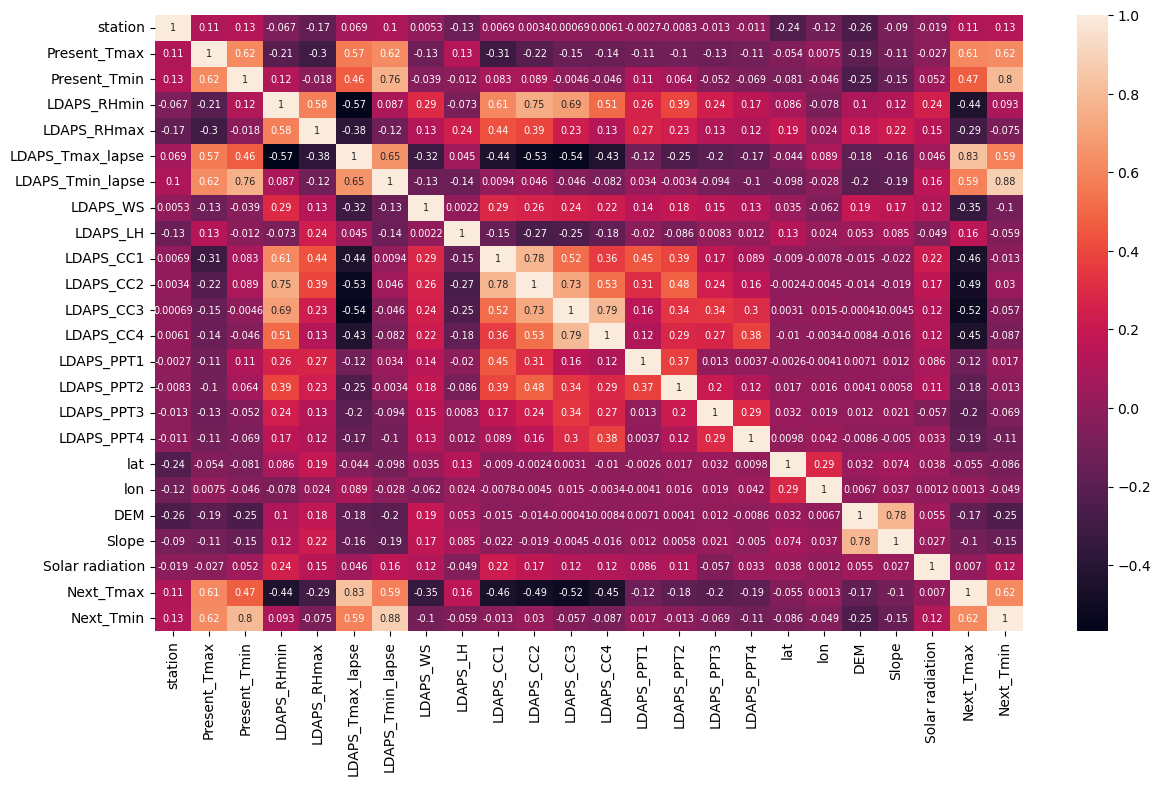

In [13]:
# Plotting Heatmap (Correlation matrix)
df_corr = df.corr() 

plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':7})
plt.show()

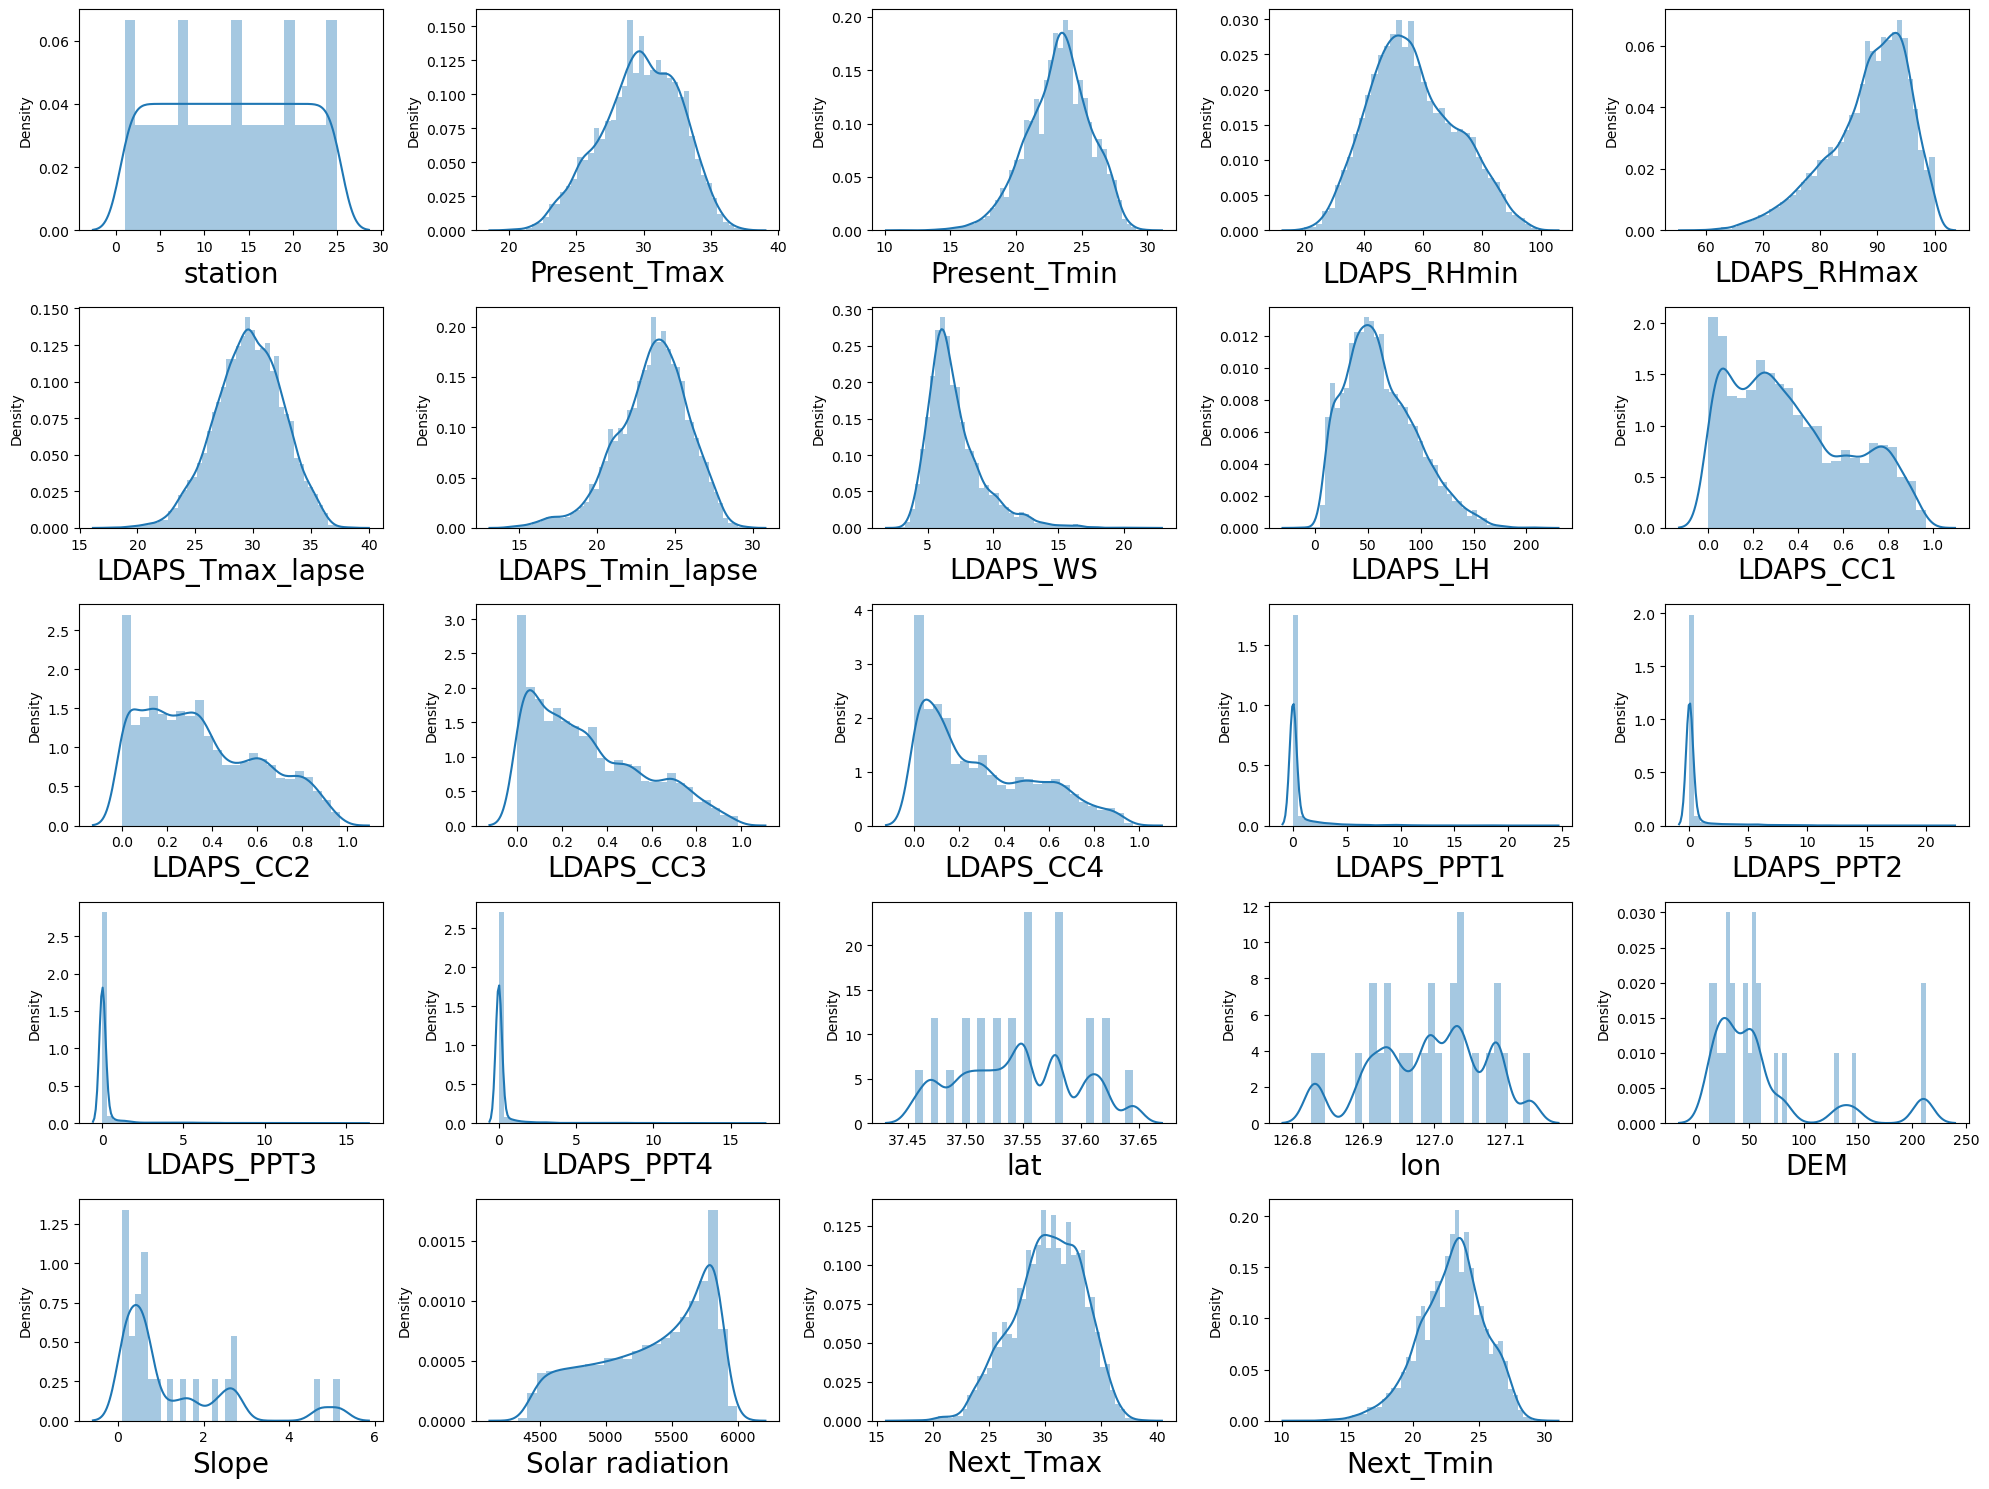

In [14]:
# draw the distplot all the features to identify the distribution of data.

plt.figure(figsize=(20,15))
plotnumber =1
for column in df[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']]:
    if plotnumber <=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

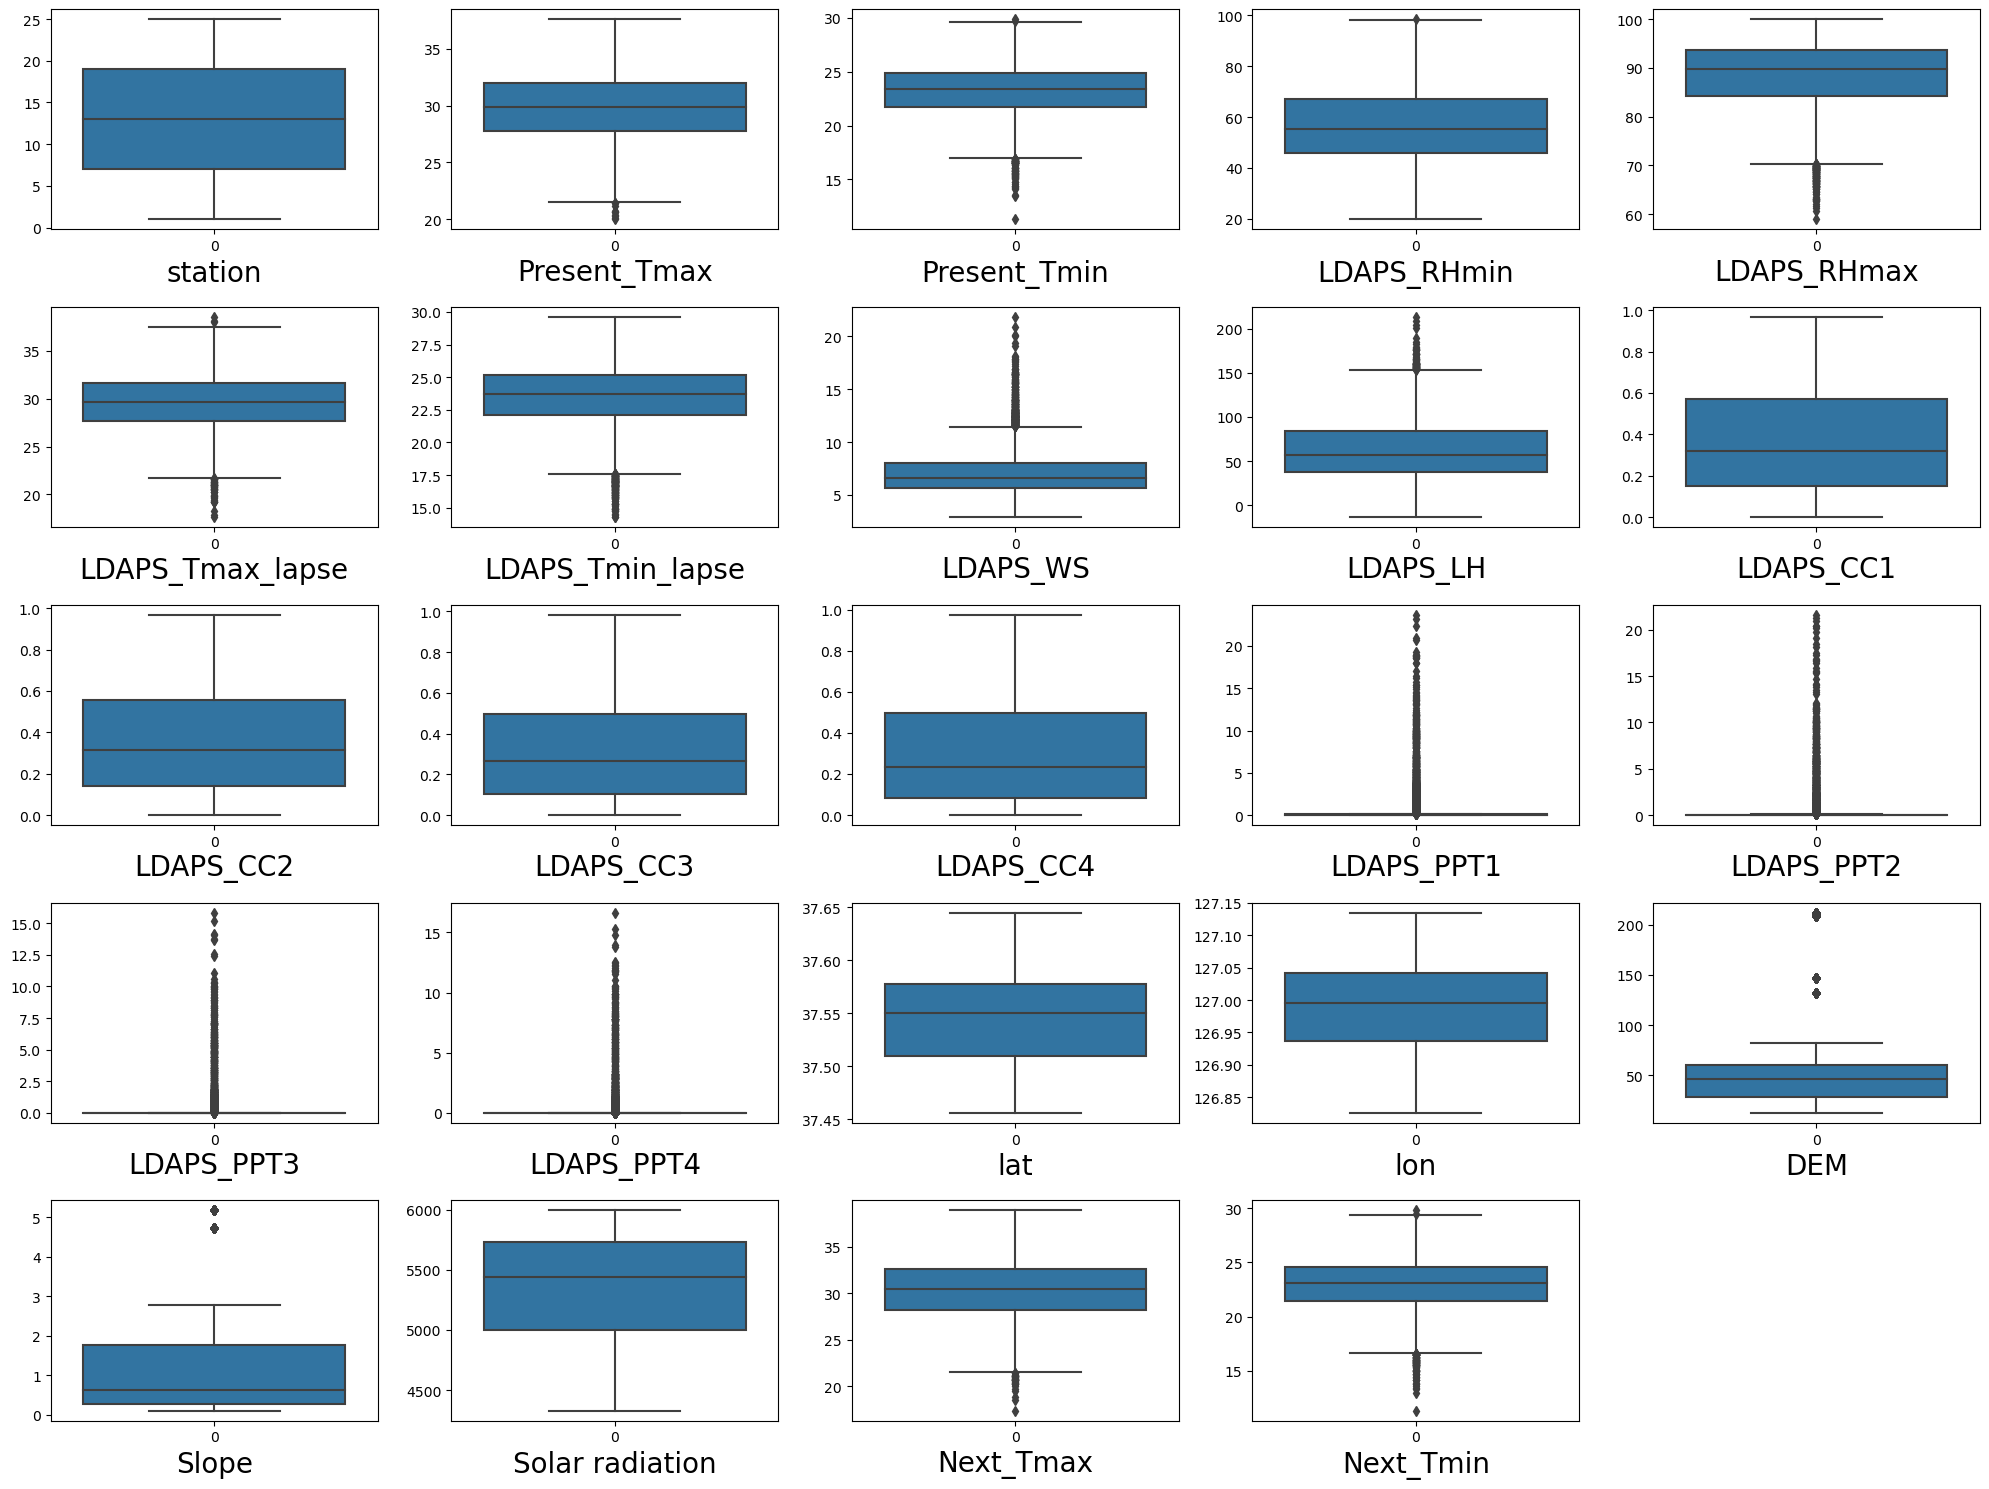

In [15]:
# Using the barplot draw the data to identify outliers

plt.figure(figsize=(20,15))
plotnumber =1
for column in df[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']]:
    if plotnumber <=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
# removing object datatype date 
df.drop("Date", axis =1 , inplace=True)

# Separating features and label Separating features and label

In [17]:
x = df.drop("Next_Tmin",axis = 1)
y = df["Next_Tmin"]

In [18]:
# Import necessory libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

# Feature scaling using standard Scalarization

In [19]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.664101,-0.361782,-0.761303,0.102641,0.383191,-0.525837,-0.217124,-0.128153,0.207567,-0.516304,...,-0.307046,-0.277548,-0.241743,-0.225419,1.189704,-0.005038,2.773649,1.115761,1.518401,-0.377009
1,-1.525426,0.721742,-0.677906,-0.308235,0.311618,0.080886,0.223971,-0.648374,-0.315028,-0.548629,...,-0.307046,-0.277548,-0.241743,-0.225419,1.189704,0.511327,-0.315050,-0.542139,1.230307,0.072027
2,-1.386750,0.620161,0.030967,-0.553222,-0.616001,0.163054,0.451635,-0.442347,-1.250882,-0.610543,...,-0.307046,-0.277548,-0.241743,-0.225419,0.653264,0.838778,-0.526200,-0.723195,1.216887,0.264471
3,-1.248075,0.755602,0.072665,0.101551,1.134018,0.031005,-0.080153,-0.667687,0.096430,-0.583623,...,-0.307046,-0.277548,-0.241743,-0.225419,1.992377,0.385384,-0.297473,0.933099,1.201522,0.456915
4,-1.109400,0.552441,-0.552811,-0.040089,0.248725,-0.170723,-0.011375,-0.628473,1.356743,-0.832456,...,-0.307046,-0.277548,-0.241743,-0.225419,0.118811,1.808536,-0.494290,-0.548418,1.207554,0.296545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.109400,-2.257950,-2.262447,-2.198944,-1.415073,-0.615110,-2.235342,-0.227689,-1.577876,-1.209753,...,-0.307046,-0.277548,-0.241743,-0.225419,0.118811,0.612081,-0.655386,-0.499795,-2.064311,-0.858118
7746,1.248075,-2.461111,-2.429240,-1.828278,-0.655669,-0.993432,-2.445137,-0.613204,0.586358,-1.157819,...,-0.307046,-0.277548,-0.241743,-0.225419,-0.685848,1.191417,-0.735219,-0.820220,-2.097462,-0.729822
7747,1.386750,-2.190230,-2.554336,-2.058222,-1.329954,-1.113925,-2.032545,-0.437410,0.285339,-1.297344,...,-0.307046,-0.277548,-0.241743,-0.225419,-0.149408,-1.264464,-0.852800,-0.804013,-2.093941,-0.633600
7748,1.525426,-2.190230,-2.304145,-2.243401,-1.550262,-0.889173,-2.050634,-0.255585,-0.455147,-1.274976,...,-0.307046,-0.277548,-0.241743,-0.225419,-0.417628,-1.037767,-0.821318,-0.755171,-2.105458,-0.537379


# Creating the training and testing data sets

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (6200, 23)
Size of y_train :  (6200,)
Size of X_test :  (1550, 23)
Size of Y_test :  (1550,)


# Machine Learning Model for Regression and Evaluation Metrics

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Linear Regression

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
cv_lr = cross_val_score(estimator = lr, X = x, y = y, cv = 10)

y_pred_lr_train = lr.predict(x_train)
r2_score_lr_train = r2_score(y_train, y_pred_lr_train)

y_pred_lr_test = lr.predict(x_test)
r2_score_lr_test = r2_score(y_test, y_pred_lr_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_lr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.761
R2_score (train) : 0.846
R2_score (test) : 0.855
RMSE : 0.929


# Support Vector Machine

In [24]:
svr=SVR()
svr.fit(x_train, y_train)

SVR()

# Hyper parameter tuning on the SVR Model

In [26]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [25] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=SVR(C=10, gamma=0.1, tol=0.0001), n_jobs=-1,
             param_grid={'C': [25], 'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [27]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(x_train, y_train)
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=25, tol=0.0001)
0.9365088524974757


In [28]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(x_train)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(x_test)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.937
R2_score (train) : 0.993
R2 score (test) : 0.920
RMSE : 0.690


In [29]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [30]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
gr = GridSearchCV(ridge_pipe, parameters, cv=10)
gr = gr.fit(x_train, y_train)

In [31]:
gr.best_estimator_, gr.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=1, random_state=42))]),
 0.8902758851757655)

# Ridge 

In [32]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(x_train, y_train)
cv_ridge = gr.best_score_

y_pred_ridge_train = ridge.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))


print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))


CV : 0.890
R2 score (train) : 0.846
R2 score (test) : 0.855
RMSE : 0.929


In [33]:
models = [('Linear Regression', rmse_linear, r2_score_lr_train, r2_score_lr_test,cv_lr.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean())
           ]

In [34]:
# create dataframe all the models we create 

predict1 = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict1

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.929276,0.845642,0.854948,0.761187
1,Ridge Regression,0.928770,0.845614,0.855106,0.890276
2,Support Vector Regression,0.689716,0.993497,0.920095,0.936509


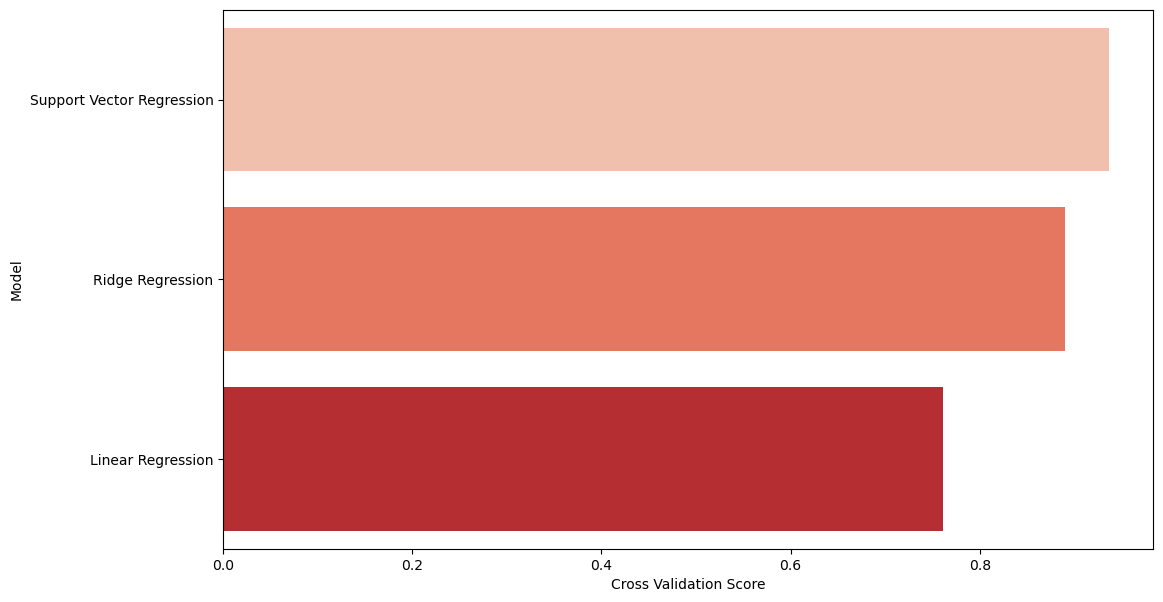

In [35]:
# Draw the barplot to easly identify which one model is the best.

plt.figure(figsize=(12,7))
predict1.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict1, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (6200, 23)
Size of y_train :  (6200,)
Size of X_test :  (1550, 23)
Size of Y_test :  (1550,)


In [37]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(x_train)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(x_test)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.937
R2_score (train) : 0.993
R2 score (test) : 0.920
RMSE : 0.690


# Saving the model

In [38]:
import joblib
import numpy as np
joblib.dump(svr, "Next_Tmin.pkl")

['Next_Tmin.pkl']

# Predicting the saved model

In [39]:
# Let's load the saved model and get the prediction 

model = joblib.load("Next_Tmin.pkl")

# Prediction 

prediction = model.predict(x_test)
prediction

array([22.33844589, 22.06538606, 24.72406714, ..., 20.76692077,
       27.86172165, 22.69422522])

# Predict vs actual 

In [40]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,22.338446,22.5
1,22.065386,23.1
2,24.724067,25.0
3,15.444958,17.5
4,20.915008,20.7
...,...,...
1545,25.810114,26.4
1546,22.545626,22.9
1547,20.766921,20.3
1548,27.861722,27.9
